In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import math
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from Distance import haversine, calc_distance, plot_cities, plot_route

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

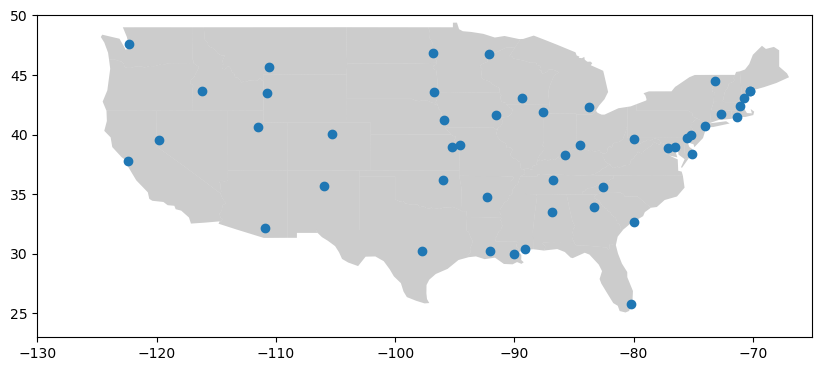

In [2]:
Birmingham = (33.5186, -86.8104)
Tucson = (32.1545, -110.8782)
Little_Rock = (34.7465, -92.2896)
San_Francisco = (37.7749, -122.4194)
Boulder = (40.01499, -105.27055)
hartford = (41.7658, -72.6734)
Wilmington = (39.7459, -75.5466)
Miami = (25.7617, -80.1918)
Athens = (33.9519, -83.3576)
Boise = (43.6150, -116.2023)
Chicago = (41.8781, -87.6298)
Lafayette = (30.2241, -92.0198)
Iowa_City = (41.6611, -91.5302)
Lawrence = (38.9717, -95.2353)
Louisville = (38.2527, -85.7585)
New_Orleans = (29.9511, -90.0715)
Portland = (45.5051, -122.6750)
Annapolis = (38.9784, -76.4922)
boston = (42.3601, -71.0589)
Ann_Arbor = (42.2808, -83.7430)
Duluth = (46.7867, -92.1005)
Gulfport = (30.3674, -89.0928)
Kansas_City = (39.0997, -94.5786)
Livingston = (45.6629, -110.5600)
Omaha = (41.2565, -95.9345)
Reno = (39.5296, -119.8138)
Portsmouth = (43.0718, -70.7626)
Ocean_City = (38.3365, -75.0849)
Santa_Fe = (35.6870, -105.9378)
New_York_City = (40.7128, -74.0060)
Asheville = (35.5951, -82.5515)
Fargo = (46.8772, -96.7898)
Cincinnati = (39.1031, -84.5120)
Tulsa = (36.1540, -95.9928)
Portland = (43.6615, -70.2553)
Philadelphia = (39.9526, -75.1652)
Newport = (41.4901, -71.3128)
Folly_Beach = (32.6552, -79.9404)
Sioux_Falls = (43.5446, -96.7311)
Nashville = (36.1627, -86.7816)
Austin = (30.2672, -97.7431)
Park_City = (40.6461, -111.4979)
Burlington = (44.4759, -73.2121)
Arlington = (38.8799697, -77.1067698)
Seattle = (47.6062, -122.3321)
Morgantown = (39.6295, -79.9559)
Madison = (43.0731, -89.4012)
Jackson_Hole = (43.4799, -110.7624)

cities = [Birmingham, Tucson, Little_Rock, San_Francisco, Boulder, hartford, Wilmington, Miami, Athens, Boise, Chicago, Lafayette, Iowa_City, Lawrence, Louisville, New_Orleans, Portland, Annapolis, boston, Ann_Arbor, Duluth, Gulfport, Kansas_City, Livingston, Omaha, Reno, Portsmouth, Ocean_City, Santa_Fe, New_York_City, Asheville, Fargo, Cincinnati, Tulsa, Portland, Philadelphia, Newport, Folly_Beach, Sioux_Falls, Nashville, Austin, Park_City, Burlington, Arlington, Seattle, Morgantown, Madison, Jackson_Hole]

distances = calc_distance(cities)

plot_cities(cities)


In [33]:
RANDOM_STATE = 42

fitness_coords = mlrose.TravellingSales(coords = cities)
fitness_dists = mlrose.TravellingSales(distances = distances)

problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_fit, max_attempts=1000, restarts=100, curve=True, random_state = RANDOM_STATE)

print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)

The best state found is:  [24 38 31 20 10 19 45  6 35 27  7 37 30 43 17 29  5 36 18 26 16 34 42 32
 14 39  8  0 21 15 11 40  4 41 47 23  9 44 25  3  1 28 33  2 46 12 22 13]
The fitness at the best state is:  211.50138777747534


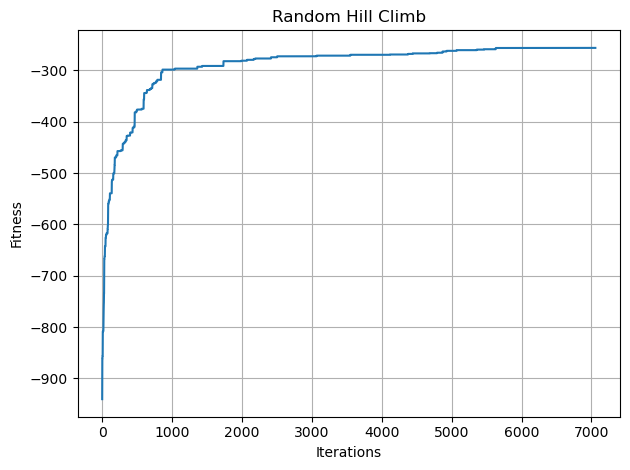

In [34]:
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_fit, max_attempts=1000, restarts=0, curve=True, random_state = RANDOM_STATE)

plt.plot(fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Random Hill Climb')
plt.tight_layout()
plt.grid()

plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\RHC_ITER_FIT.png', 
                transparent = False,  
                facecolor = 'white'
               )

plt.show()

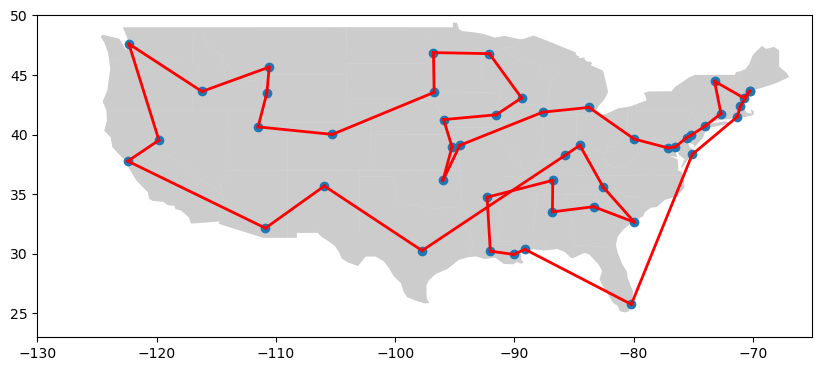

In [21]:
plot_route(cities, best_state)

In [27]:
import imageio

def create_frame(iter):
    RANDOM_STATE = 42

    fitness_coords = mlrose.TravellingSales(coords = cities)
    fitness_dists = mlrose.TravellingSales(distances = distances)

    problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

    print(f'Running... iter: {iter}')
    best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters=iter, max_attempts=1000, restarts=100, random_state = RANDOM_STATE)

    df = pd.DataFrame(cities)
    geometry = [Point(xy) for xy in zip(df[1], df[0])]

    map = gpd.read_file(r'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\data\ne_110m_admin_1_states_provinces.shp')

    geo_df = gpd.GeoDataFrame(df,
        geometry = geometry)

    fig, ax = plt.subplots(figsize=(10,5))
    map.plot(ax=ax, alpha=0.4,color='grey')

    for i, line in enumerate(best_state):
        if i < 47:
            x0, y0 = cities[best_state[i+1]]
            x1, y1 = cities[best_state[i]]
            ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)

    x0, y0 = cities[best_state[-1]]
    x1, y1 = cities[best_state[0]]
    ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)    

    geo_df.plot(ax=ax)

    plt.xlim(-130,-65)
    plt.ylim(23,50)

    plt.title(f'Random Hill Climb - {iter} iterations')
    plt.tight_layout()
    plt.text(-129, 24, f'Fitness: {round(best_fitness, 2)}', fontsize=12)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()


iters = [i for i in range(1000, 11000, 1000)]
frames = []

for i, iter in enumerate(iters):
    create_frame(iter)

frames = []
for i, iter in enumerate(iters):
    image = imageio.v2.imread(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png')
    frames.append(image)

imageio.mimsave(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\test.gif',
                frames,          
                fps = 2)


Running... iter: 1000
Running... iter: 2000
Running... iter: 3000
Running... iter: 4000
Running... iter: 5000
Running... iter: 6000
Running... iter: 7000
Running... iter: 8000
Running... iter: 9000
Running... iter: 10000


## GA

In [45]:
RANDOM_STATE = 1

fitness_coords = mlrose.TravellingSales(coords = cities)
fitness_dists = mlrose.TravellingSales(distances = distances)

problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_fit, pop_size=500, mutation_prob=0.1, max_attempts=100, max_iters=100, curve=True, random_state = RANDOM_STATE)

print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)

The best state found is:  [37  0 23 18 41 28  4 31  8 21  7 43 22 46 11 40  9 32 27  1 19  5 30 10
 26 29 16 14 42 34 36 35 24 15 33 12  3 25 44 47 20 38  2 13  6 17 39 45]
The fitness at the best state is:  644.3347968410718


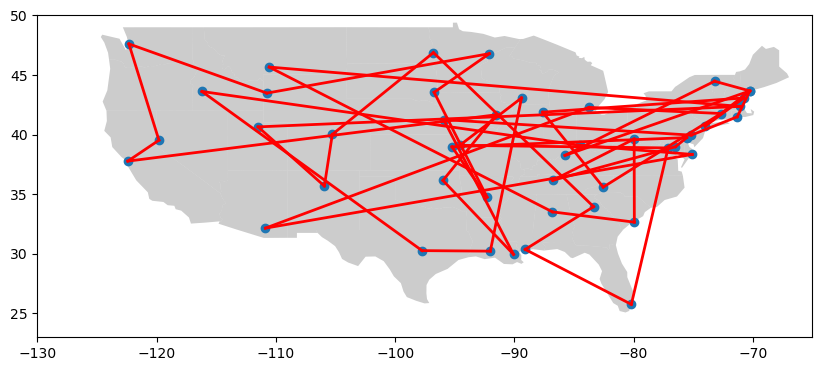

In [46]:
plot_route(cities, best_state)

In [47]:
best_state = None
best_fitness = float('inf')
best_params = None

for random in range(1, 100):
    current_state, current_fitness, fitness_curve = mlrose.genetic_alg(problem_fit, pop_size=500, mutation_prob=0.1, max_attempts=100, max_iters=100, curve=True, random_state = random)

    if current_fitness < best_fitness:
            best_state = current_state
            best_fitness = current_fitness
            best_params = {
                'random': random
            }

print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)
print('The best params are: ', best_params)

The best state found is:  [33 34 14 29 16  0 15 36 26 18 19 22 46 25 27 43 12  3 44  1 40 24 28  9
 23 47 41 38 10 39 17  5  8 35 37 30  2 32  6 45 42  7  4 20 31 13 11 21]
The fitness at the best state is:  571.0663385719622
The best params are:  {'random': 74}


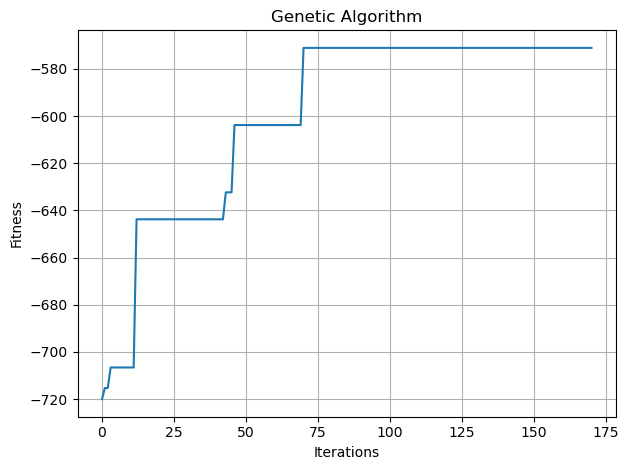

In [58]:
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_fit, pop_size=500, mutation_prob=0.1, max_attempts=100, max_iters=1000, curve=True, random_state = 74)


plt.plot(fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm')
plt.tight_layout()
plt.grid()

plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\GA_ITER_FIT.png', 
                transparent = False,  
                facecolor = 'white'
               )

plt.show()

In [48]:
import imageio

def create_frame(iter):
    RANDOM_STATE = 74

    fitness_coords = mlrose.TravellingSales(coords = cities)
    fitness_dists = mlrose.TravellingSales(distances = distances)

    problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

    print(f'Running... iter: {iter}')
    best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=500, max_iters=iter, max_attempts=1000, random_state = RANDOM_STATE)

    df = pd.DataFrame(cities)
    geometry = [Point(xy) for xy in zip(df[1], df[0])]

    map = gpd.read_file(r'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\data\ne_110m_admin_1_states_provinces.shp')

    geo_df = gpd.GeoDataFrame(df,
        geometry = geometry)

    fig, ax = plt.subplots(figsize=(10,5))
    map.plot(ax=ax, alpha=0.4,color='grey')

    for i, line in enumerate(best_state):
        if i < 47:
            x0, y0 = cities[best_state[i+1]]
            x1, y1 = cities[best_state[i]]
            ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)

    x0, y0 = cities[best_state[-1]]
    x1, y1 = cities[best_state[0]]
    ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)    

    geo_df.plot(ax=ax)

    plt.xlim(-130,-65)
    plt.ylim(23,50)

    plt.title(f'Genetic Algorithm - {iter} iterations')
    plt.tight_layout()
    plt.text(-129, 24, f'Fitness: {round(best_fitness, 2)}', fontsize=12)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()


iters = [i for i in range(1000, 11000, 1000)]
frames = []

for i, iter in enumerate(iters):
    create_frame(iter)

frames = []
for i, iter in enumerate(iters):
    image = imageio.v2.imread(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png')
    frames.append(image)

imageio.mimsave(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\GA.gif',
                frames,          
                fps = 2)


Running... iter: 1000
Running... iter: 2000
Running... iter: 3000
Running... iter: 4000
Running... iter: 5000
Running... iter: 6000
Running... iter: 7000
Running... iter: 8000
Running... iter: 9000
Running... iter: 10000


## SA

In [54]:
RANDOM_STATE = 74

fitness_coords = mlrose.TravellingSales(coords = cities)
fitness_dists = mlrose.TravellingSales(distances = distances)

problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_fit, curve=True, random_state = RANDOM_STATE)

print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)

The best state found is:  [31 13  1 41 12 20 28 38 26 34 46 33 22 44 23 40 37 17  0 21 11  7 14 24
  9 25  3 47 18 16 36  5  6 45 27 43 42 35 29  8 32 19  4 39  2 15 30 10]
The fitness at the best state is:  503.6607318436706


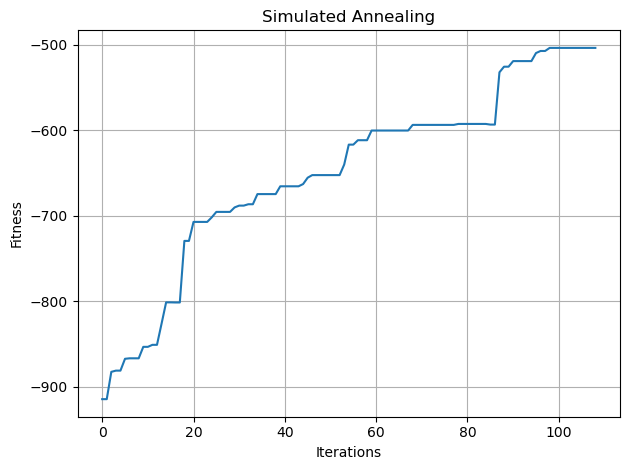

In [55]:
plt.plot(fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Simulated Annealing')
plt.tight_layout()
plt.grid()

plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\SA_ITER_FIT.png', 
                transparent = False,  
                facecolor = 'white'
               )

plt.show()

In [56]:
import imageio

def create_frame(iter):
    RANDOM_STATE = 74

    fitness_coords = mlrose.TravellingSales(coords = cities)
    fitness_dists = mlrose.TravellingSales(distances = distances)

    problem_fit = mlrose.TSPOpt(length = 48, fitness_fn = fitness_coords, maximize=False)

    print(f'Running... iter: {iter}')
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit, max_iters=iter, max_attempts=1000, random_state = RANDOM_STATE)

    df = pd.DataFrame(cities)
    geometry = [Point(xy) for xy in zip(df[1], df[0])]

    map = gpd.read_file(r'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\data\ne_110m_admin_1_states_provinces.shp')

    geo_df = gpd.GeoDataFrame(df,
        geometry = geometry)

    fig, ax = plt.subplots(figsize=(10,5))
    map.plot(ax=ax, alpha=0.4,color='grey')

    for i, line in enumerate(best_state):
        if i < 47:
            x0, y0 = cities[best_state[i+1]]
            x1, y1 = cities[best_state[i]]
            ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)

    x0, y0 = cities[best_state[-1]]
    x1, y1 = cities[best_state[0]]
    ax.plot([y0, y1], [x0, x1], color='red', linewidth=2, zorder=3)    

    geo_df.plot(ax=ax)

    plt.xlim(-130,-65)
    plt.ylim(23,50)

    plt.title(f'Simulated Annealing - {iter} iterations')
    plt.tight_layout()
    plt.text(-129, 24, f'Fitness: {round(best_fitness, 2)}', fontsize=12)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()


iters = [i for i in range(1000, 11000, 1000)]
frames = []

for i, iter in enumerate(iters):
    create_frame(iter)

frames = []
for i, iter in enumerate(iters):
    image = imageio.v2.imread(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\img_{iter}.png')
    frames.append(image)

imageio.mimsave(fr'C:\Users\jthan\OneDrive\Desktop\2023\PP\RoadTripOptimizer\images\SA.gif',
                frames,          
                fps = 2)


Running... iter: 1000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 2000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 3000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 4000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 5000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 6000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 7000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 8000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 9000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Running... iter: 10000


c:\Users\jthan\anaconda3\Lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
